# Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot  as plt
import seaborn as sns
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import pickle
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split # data split
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

# Read file
https://www.kaggle.com/bartoszpieniak/poland-cars-for-sale-dataset?select=Car_sale_ads.csv

In [2]:
file_cars = "Car_sale_ads.csv" 

In [3]:
cols = ['Price', 'Currency', 'Condition', 'Vehicle_brand',
       'Vehicle_model', 'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'Drive', 'Transmission', 'Type',
       'Doors_number','Features']
df_cars = pd.read_csv(filepath_or_buffer=file_cars, usecols=cols)
print(df_cars.shape)
df_cars.info()

(208304, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             208304 non-null  int64  
 1   Currency          208304 non-null  object 
 2   Condition         208304 non-null  object 
 3   Vehicle_brand     208304 non-null  object 
 4   Vehicle_model     208304 non-null  object 
 5   Production_year   208304 non-null  int64  
 6   Mileage_km        207321 non-null  float64
 7   Power_HP          207661 non-null  float64
 8   Displacement_cm3  206338 non-null  float64
 9   Fuel_type         208304 non-null  object 
 10  Drive             193228 non-null  object 
 11  Transmission      207825 non-null  object 
 12  Type              208304 non-null  object 
 13  Doors_number      206817 non-null  float64
 14  Features          208304 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 23.8+ 

## Sample of dataset

In [8]:
df_cars.sample(5)

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Features
19576,60900,PLN,used,bmw,seria 1,2017,"34,100.00",136.00,"1,499.00",Gasoline,rear wheels,manual,compact,5.00,"['ABS', 'Electric front windows', 'Drivers air..."
90634,79900,PLN,used,lexus,is,2014,"60,000.00",208.00,"2,500.00",Gasoline,4x4 (attached automatically),automatic,sedan,4.00,"['ABS', 'Electric front windows', 'Drivers air..."
137580,188900,PLN,new,peugeot,508,2020,2.00,180.00,"1,598.00",Hybrid,front wheels,automatic,station_wagon,5.00,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
169104,56990,PLN,used,škoda,fabia,2020,"8,630.00",95.00,999.00,Gasoline,front wheels,manual,compact,5.00,"['ABS', 'ASR (traction control)', 'Front parki..."
35027,64900,PLN,used,bmw,x6,2010,"319,000.00",306.00,"2,993.00",Diesel,4x4 (permanent),automatic,suv,5.00,"['ABS', 'Electrically adjustable mirrors', 'Po..."


In [4]:
df_cars.describe()

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number
count,"208,304.00","208,304.00","207,321.00","207,661.00","206,338.00","206,817.00"
mean,"63,053.83","2,012.10","150,276.76",151.84,"1,882.57",4.64
std,"86,659.67",7.00,"2,937,446.81",77.68,729.61,0.77
min,500.00,"1,915.00",1.00,1.00,400.00,1.00
25%,"17,800.00","2,008.00","53,000.00",105.00,"1,461.00",5.00
50%,"35,700.00","2,013.00","144,566.00",136.00,"1,798.00",5.00
75%,"75,990.00","2,017.00","206,000.00",172.00,"1,997.00",5.00
max,"6,999,000.00","2,021.00","1,111,111,111.00","1,398.00","8,400.00",55.00


In table above we may notice a few outliers in variables like *Door_number*, *Mileage_km* or *Price*.

## Type of columns

In [5]:
df_cars.keys()

Index(['Price', 'Currency', 'Condition', 'Vehicle_brand', 'Vehicle_model',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'Drive', 'Transmission', 'Type', 'Doors_number',
       'Features'],
      dtype='object')

In [6]:
categorical_columns = ['Condition', 'Vehicle_brand',
       'Vehicle_model','Drive',
       'Transmission', 'Type']
numerical_columns = ['Production_year','Mileage_km','Power_HP','Displacement_cm3','Doors_number']

In [7]:
for i in df_cars[categorical_columns].columns:
    df_cars[i] = df_cars[i].str.lower()

## Values in dataset

### Numerical

In [9]:
numerical = ['Price','Production_year','Mileage_km','Power_HP','Displacement_cm3','Doors_number']
categorical = ['Vehicle_brand','Vehicle_model','Transmission','Type']

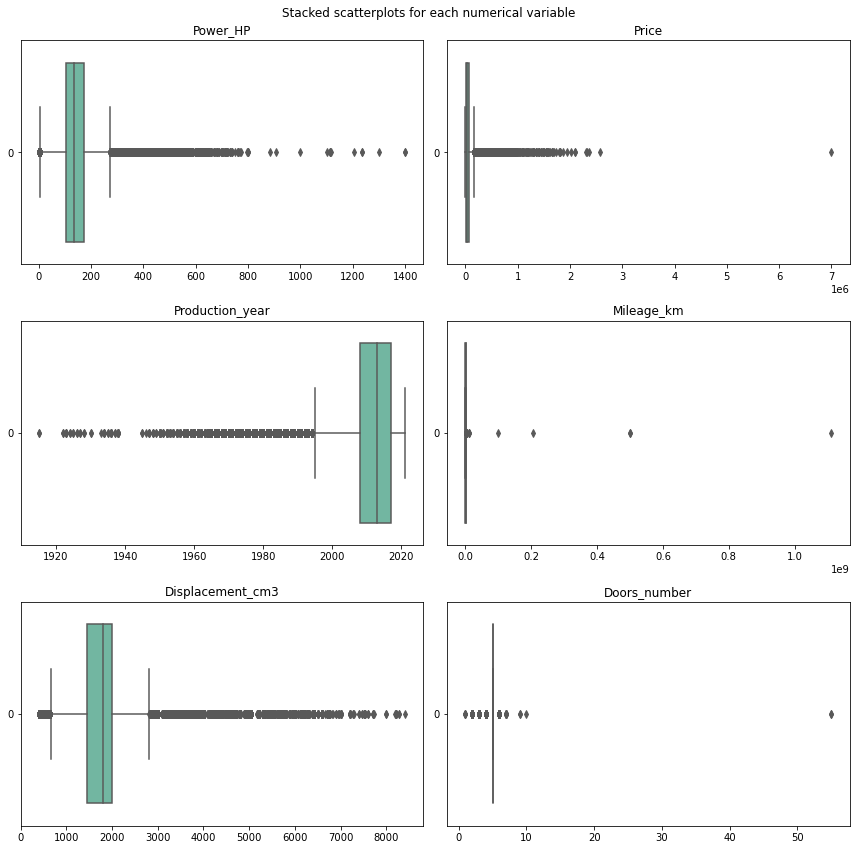

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(12,12))
fig.suptitle('Stacked scatterplots for each numerical variable')
axs_power = sns.boxplot(data=df_cars['Power_HP'], orient="h", palette="Set2", ax=axs[0,0])
axs[0,0].set_title('Power_HP')
axs_price = sns.boxplot(data=df_cars['Price'], orient="h", palette="Set2", ax=axs[0,1])
axs[0, 1].set_title('Price')

axs_year = sns.boxplot(data=df_cars['Production_year'], orient="h", palette="Set2", ax=axs[1,0])
axs[1,0].set_title('Production_year')
axs_mileage = sns.boxplot(data=df_cars['Mileage_km'], orient="h", palette="Set2", ax=axs[1,1])
axs[1, 1].set_title('Mileage_km')

axs_year = sns.boxplot(data=df_cars['Displacement_cm3'], orient="h", palette="Set2", ax=axs[2,0])
axs[2,0].set_title('Displacement_cm3')
axs_mileage = sns.boxplot(data=df_cars['Doors_number'], orient="h", palette="Set2", ax=axs[2,1])
axs[2, 1].set_title('Doors_number')
fig.tight_layout()

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Production_year'}>,
        <AxesSubplot:title={'center':'Mileage_km'}>,
        <AxesSubplot:title={'center':'Power_HP'}>],
       [<AxesSubplot:title={'center':'Displacement_cm3'}>,
        <AxesSubplot:title={'center':'Doors_number'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

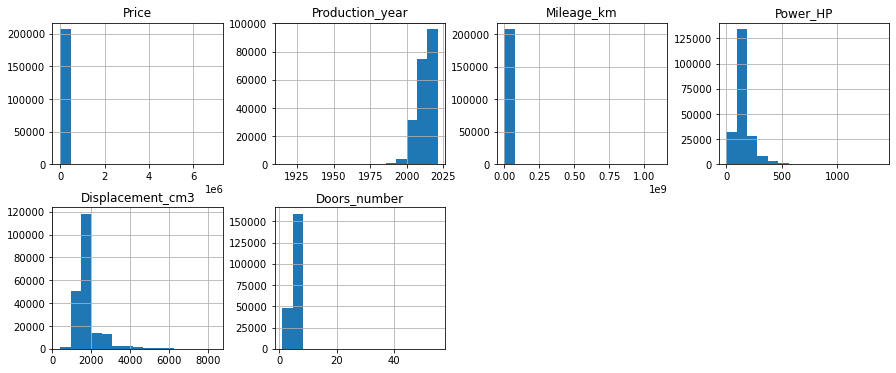

In [11]:
df_cars[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4))

### Price

First we need to deal with various currency, so let's swap all curriecies to the PLN.

Text(0.5, 1.0, 'Basic characteristics for Price category')

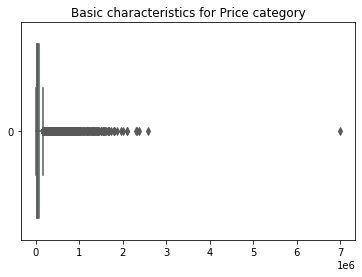

In [12]:
x = sns.boxplot(data=df_cars['Price'], orient="h", palette="Set2")
plt.title('Basic characteristics for Price category')

In [13]:
df_cars.Currency.value_counts()

PLN    208034
EUR       270
Name: Currency, dtype: int64

In [14]:
df_cars = df_cars[df_cars.Currency=='PLN']

In [15]:
df_cars.Currency.value_counts()

PLN    208034
Name: Currency, dtype: int64

So basic stats of **Price** looks as follow

In [16]:
df_cars.Price.describe()

count     208,034.00
mean       63,062.79
std        86,614.78
min           585.00
25%        17,800.00
50%        35,800.00
75%        75,990.00
max     6,999,000.00
Name: Price, dtype: float64

The average **Price** is around 63k, with std equal 86k we may notice that there are some more expensive cars. It is also shown with max **Price** as almost 7mil. Minimum **Price** is 500PLN and second quartile is almost 36k.

In [17]:
df_cars.sort_values(['Price'], ascending=False).head(10)

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Features
32304,6999000,PLN,used,bmw,x3,2014,"238,000.00",190.00,"2,000.00",Diesel,4x4 (permanent),automatic,suv,5.00,"['ABS', 'Central locking', 'Electric rear wind..."
142814,2583000,PLN,used,porsche,911,2019,40.00,700.00,"3,800.00",Gasoline,rear wheels,automatic,coupe,2.00,[]
153914,2370000,PLN,new,rolls-royce,ghost,2020,43.00,570.00,"6,592.00",Gasoline,4x4 (attached automatically),automatic,sedan,4.00,"['ABS', 'Electric front windows', 'Drivers air..."
153915,2330000,PLN,new,rolls-royce,cullinan,2020,89.00,571.00,"6,749.00",Gasoline,4x4 (permanent),automatic,suv,5.00,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
88260,2300000,PLN,used,lamborghini,aventador,2016,"5,500.00",750.00,"6,498.00",Gasoline,4x4 (permanent),automatic,coupe,2.00,[]
153920,2101970,PLN,new,rolls-royce,wraith,2019,3.00,624.00,"6,592.00",Gasoline,rear wheels,automatic,coupe,2.00,"['ABS', 'Electric front windows', 'Drivers air..."
153912,2100000,PLN,used,rolls-royce,cullinan,2018,"26,000.00",563.00,"6,749.00",Gasoline,4x4 (attached automatically),automatic,suv,5.00,"['Alloy wheels', 'Blind spot sensor', 'Rear pa..."
153925,2013000,PLN,new,rolls-royce,wraith,2019,2.00,624.00,"6,592.00",Gasoline,rear wheels,automatic,coupe,2.00,"['ABS', 'Electric front windows', 'Drivers air..."
153921,1950000,PLN,new,rolls-royce,wraith,2019,3.00,624.00,"6,592.00",Gasoline,rear wheels,automatic,coupe,2.00,"['ABS', 'Electric front windows', 'Drivers air..."
95654,1862200,PLN,new,mclaren,720s spider,2019,1.00,720.00,"3,989.00",Gasoline,NaN,automatic,convertible,3.00,[]


Two first results are just imposible to be true, let drop them. 

In [18]:
df_cars = df_cars[df_cars.Price<2583000]

In [19]:
df_cars.Price.describe()

count     208,032.00
mean       63,017.34
std        85,090.62
min           585.00
25%        17,800.00
50%        35,800.00
75%        75,990.00
max     2,370,000.00
Name: Price, dtype: float64

What about min Price?

In [20]:
df_cars[df_cars.Price<=df_cars.Price.min()+100]

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Features
50925,585,PLN,new,fiat,tipo,2021,1.00,100.00,999.00,Gasoline,front wheels,manual,compact,5.00,"['ABS', 'Bluetooth', 'Front parking sensors', ..."
50940,585,PLN,new,fiat,tipo,2021,1.00,100.00,999.00,Gasoline,front wheels,manual,compact,5.00,"['ABS', 'Bluetooth', 'Twilight sensor', 'Elect..."
87094,599,PLN,used,kia,picanto,2012,"54,000.00",85.00,"1,248.00",Gasoline,front wheels,manual,small_cars,3.00,"['ABS', 'Electric front windows', 'Passengers ..."
153243,650,PLN,used,renault,clio,2001,"202,000.00",65.00,"1,461.00",Diesel,front wheels,manual,small_cars,5.00,"['ABS', 'Electric front windows', 'Drivers air..."
196408,650,PLN,used,volkswagen,polo,1995,"186,000.00",45.00,"1,043.00",Gasoline,front wheels,manual,city_cars,3.00,[]
203755,649,PLN,used,volvo,s40,2006,"237,771.00",136.00,"1,998.00",Diesel,front wheels,manual,sedan,4.00,"['ABS', 'Electric front windows', 'Drivers air..."


As we can see these 2 new cars are out outliers, we can drop them or adjust their Price based on average, median or just take similar value for new Fiat Tipo from 2021.

In [21]:
new_mean = df_cars[(df_cars.Vehicle_model=='tipo')&(df_cars.Production_year==2021)&(df_cars.Condition=='new')].Price.mean()
df_cars.loc[(df_cars.Vehicle_model=='tipo')&(df_cars.Price==585),'Price'] = new_mean

In [22]:
df_cars[df_cars.Price<=df_cars.Price.min()+100]

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Features
87094,599.00,PLN,used,kia,picanto,2012,"54,000.00",85.00,"1,248.00",Gasoline,front wheels,manual,small_cars,3.00,"['ABS', 'Electric front windows', 'Passengers ..."
153243,650.00,PLN,used,renault,clio,2001,"202,000.00",65.00,"1,461.00",Diesel,front wheels,manual,small_cars,5.00,"['ABS', 'Electric front windows', 'Drivers air..."
196408,650.00,PLN,used,volkswagen,polo,1995,"186,000.00",45.00,"1,043.00",Gasoline,front wheels,manual,city_cars,3.00,[]
203755,649.00,PLN,used,volvo,s40,2006,"237,771.00",136.00,"1,998.00",Diesel,front wheels,manual,sedan,4.00,"['ABS', 'Electric front windows', 'Drivers air..."


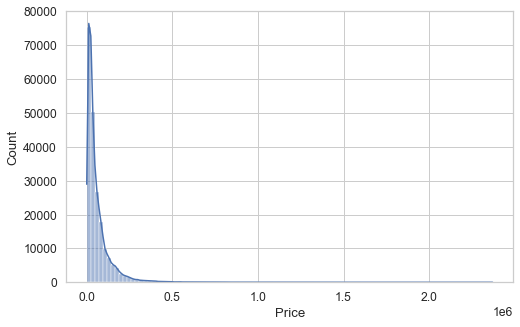

In [23]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(
    df_cars['Price'], kde=True, bins=100).set(xlabel='Price', ylabel='Count');

As we can notice **Price** mostly is below 100k. So let's check histogram in **Price** range 0-100k 

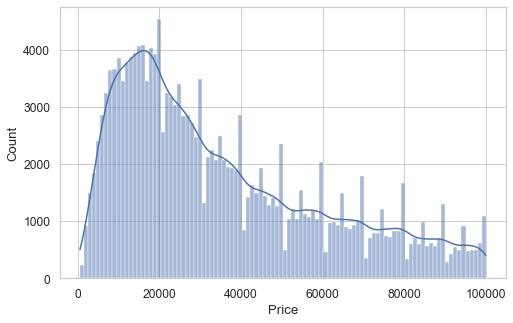

In [24]:
prize_range_hist = df_cars[df_cars.Price<=100000]
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(
    prize_range_hist['Price'], kde=True, bins=100).set(xlabel='Price', ylabel='Count');

There are many peaks that can refer to the end of the ten thousands, such as 299999, 39999, 499999 and so on. 

In [25]:
prize_range_hist.Price.value_counts().head(10).to_frame()

,Price
"19,900.00",2275
"29,900.00",1894
"16,900.00",1832
"17,900.00",1778
"18,900.00",1730
"15,900.00",1724
"14,900.00",1678
"24,900.00",1644
"13,900.00",1625
"39,900.00",1601


Let's check one more time boxplot without outliers

Text(0.5, 1.0, 'Basic characteristics for Price category')

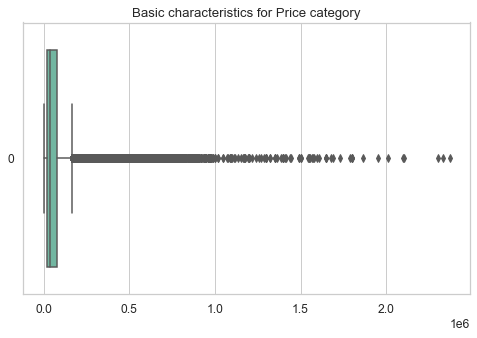

In [26]:
x = sns.boxplot(data=df_cars['Price'], orient="h", palette="Set2")
plt.title('Basic characteristics for Price category')

### Production_year

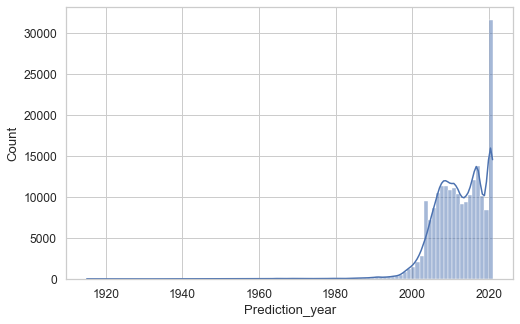

In [27]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(
    df_cars['Production_year'], kde=True, bins=100).set(xlabel='Prediction_year', ylabel='Count');

Text(0.5, 1.0, 'Basic characteristics for Production_year category')

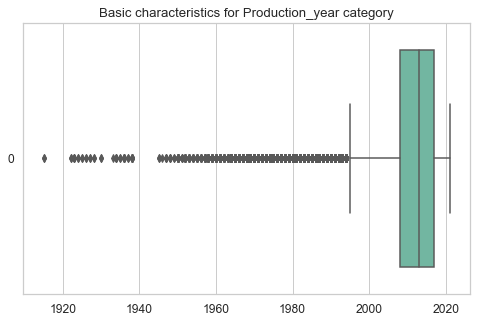

In [28]:
x = sns.boxplot(data=df_cars['Production_year'], orient="h", palette="Set2")
plt.title('Basic characteristics for Production_year category')

### Mileage

Text(0.5, 1.0, 'Basic characteristics for Mileage_km category')

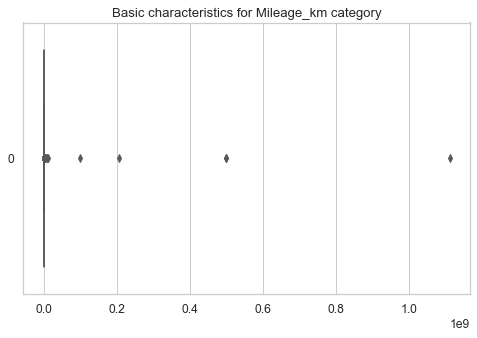

In [29]:
x = sns.boxplot(data=df_cars['Mileage_km'], orient="h", palette="Set2")
plt.title('Basic characteristics for Mileage_km category')

In [30]:
df_cars.Mileage_km.value_counts().to_frame()

,Mileage_km
1.00,9014
5.00,7147
10.00,3238
"220,000.00",1169
"180,000.00",1161
...,...
"45,838.00",1
"32,821.00",1
"29,931.00",1
"24,809.00",1


In [31]:
df_cars.Mileage_km.describe()

count         207,049.00
mean          150,380.34
std         2,939,372.88
min                 1.00
25%            53,000.00
50%           144,879.00
75%           206,000.00
max     1,111,111,111.00
Name: Mileage_km, dtype: float64

In [32]:
len(df_cars[df_cars.Mileage_km>500000])
df_cars = df_cars[df_cars.Mileage_km<500000]

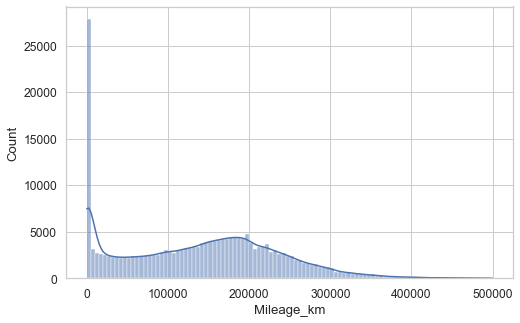

In [33]:
ax = sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
ax = sns.histplot(
    df_cars['Mileage_km'], kde=True, bins=100)


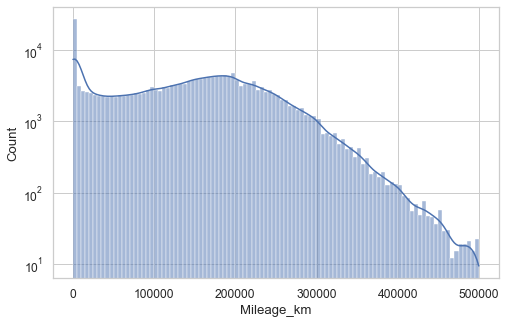

In [34]:
ax = sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
ax = sns.histplot(
    df_cars['Mileage_km'], kde=True, bins=100)
plt.yscale('log')

Text(0.5, 1.0, 'Basic characteristics for Mileage_km category')

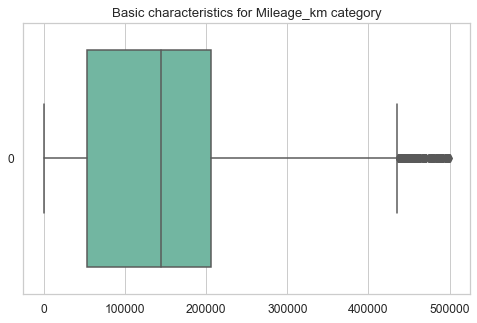

In [35]:
x = sns.boxplot(data=df_cars['Mileage_km'], orient="h", palette="Set2")
plt.title('Basic characteristics for Mileage_km category')

### Power_HP

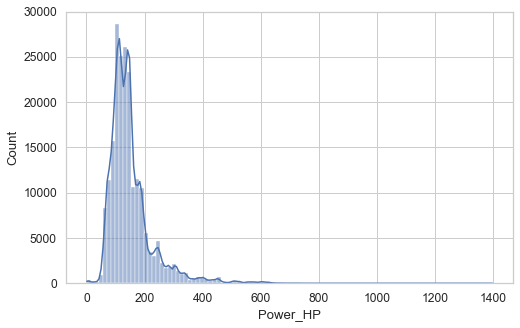

In [36]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(
    df_cars['Power_HP'], kde=True, bins=100).set(xlabel='Power_HP', ylabel='Count');

Text(0.5, 1.0, 'Basic characteristics for Power_HP category')

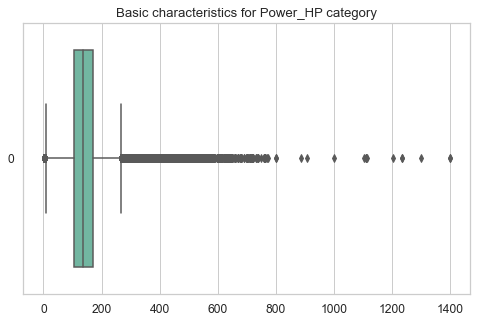

In [37]:
x = sns.boxplot(data=df_cars['Power_HP'], orient="h", palette="Set2")
plt.title('Basic characteristics for Power_HP category')

### Displacement_cm3

In [38]:
df_cars.Displacement_cm3.value_counts()

1,598.00    15331
1,968.00    13291
1,995.00    10496
1,997.00     8799
1,998.00     8002
            ...  
5,481.00        1
3,586.00        1
3,981.00        1
4,821.00        1
5,948.00        1
Name: Displacement_cm3, Length: 1173, dtype: int64

lets round it a bit Displacement_cm3

In [39]:
df_cars['Displacement_cm3'] = round(df_cars.Displacement_cm3,-2)

In [40]:
df_cars.Displacement_cm3.describe()

count   204,924.00
mean      1,889.04
std         730.33
min         400.00
25%       1,500.00
50%       1,800.00
75%       2,000.00
max       8,400.00
Name: Displacement_cm3, dtype: float64

In [41]:
df_cars[df_cars.Displacement_cm3<999].head(10)

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Features
73,"20,900.00",PLN,used,aixam,city,2014,"78,000.00",5.00,400.00,Diesel,front wheels,automatic,small_cars,3.00,['Electric front windows']
74,"35,900.00",PLN,used,aixam,crossover,2015,"16,850.00",21.00,500.00,Gasoline,front wheels,automatic,small_cars,3.00,[]
75,"28,500.00",PLN,used,aixam,crossline,2014,"31,286.00",5.00,400.00,Diesel,front wheels,automatic,small_cars,2.00,"['Central locking', 'Alloy wheels', 'SD socket..."
76,"14,800.00",PLN,used,aixam,crossline,2009,"41,000.00",5.00,400.00,Diesel,front wheels,automatic,small_cars,3.00,"['ABS', 'Rear parking sensors', 'Aftermarket r..."
77,"9,000.00",PLN,used,aixam,other,2000,"69,000.00",4.00,400.00,Diesel,front wheels,automatic,small_cars,3.00,"['CD', 'Central locking', 'Electric front wind..."
79,"13,000.00",PLN,used,aixam,a721,2005,"120,000.00",5.00,400.00,Diesel,NaN,automatic,small_cars,2.00,[]
80,"13,900.00",PLN,used,aixam,crossline,2007,"73,000.00",5.00,400.00,Diesel,NaN,automatic,small_cars,3.00,"['Central locking', 'Aftermarket radio', 'Elec..."
81,"14,900.00",PLN,used,aixam,crossline,2014,"20,000.00",20.00,400.00,Diesel,NaN,automatic,coupe,3.00,[]
82,"19,500.00",PLN,used,aixam,city,2010,"51,186.00",5.00,400.00,Diesel,front wheels,automatic,small_cars,3.00,"['Alloy wheels', 'CD', 'Factory radio', 'Centr..."
83,"78,900.00",PLN,new,aixam,city,2021,1.00,8.00,500.00,Diesel,front wheels,automatic,small_cars,3.00,"['Alloy wheels', 'Rear parking sensors', 'Manu..."


In [42]:
displacement = df_cars.Displacement_cm3.value_counts().to_frame().reset_index()
displacement

,index,Displacement_cm3
0,"2,000.00",59683
1,"1,600.00",32637
2,"1,400.00",16702
3,"1,200.00",12944
4,"1,500.00",12616
...,...,...
71,"7,300.00",3
72,"7,400.00",2
73,"8,000.00",2
74,"8,300.00",2


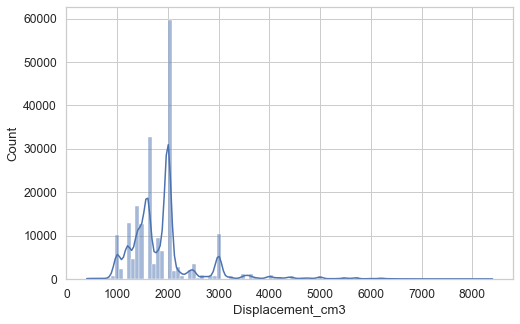

In [43]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.histplot(
    df_cars['Displacement_cm3'], kde=True, bins=100).set(xlabel='Displacement_cm3', ylabel='Count');

Text(0.5, 1.0, 'Basic characteristics for Displacement_cm3 category')

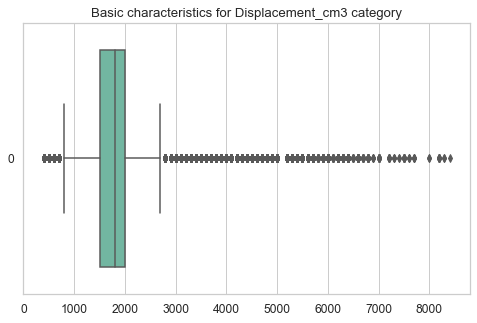

In [44]:
x = sns.boxplot(data=df_cars['Displacement_cm3'], orient="h", palette="Set2")
plt.title('Basic characteristics for Displacement_cm3 category')

## Categorical

### Condition

In [45]:
df_cars.Condition.value_counts()

used    182370
new      24435
Name: Condition, dtype: int64

In this dataset we got mostly **Used** cars = 182k and 25k labelled as **NEW**

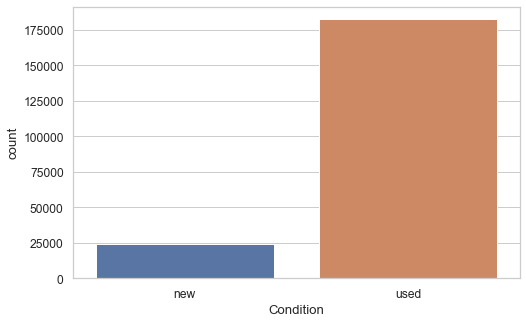

In [46]:
ax = sns.countplot(x="Condition", data=df_cars)

### Brand (top 20)

There is also an issue that some models are named as "Inny". 

In [47]:
display(df_cars[df_cars.Vehicle_brand=='inny'])

,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Features
132420,"2,750.00",PLN,used,inny,other,2003,"260,000.00",11.00,"1,400.00",Diesel,NaN,manual,small_cars,5.00,[]
132421,"4,550.00",PLN,used,inny,other,2003,"128,000.00",11.00,"1,600.00",Gasoline,NaN,manual,convertible,2.00,[]
132427,"2,550.00",PLN,used,inny,other,1999,"235,000.00",11.00,"1,500.00",Gasoline + LPG,NaN,manual,compact,5.00,[]
132432,"20,900.00",PLN,used,inny,other,2019,350.00,4.00,NaN,Electric,rear wheels,automatic,small_cars,2.00,[]
132433,"5,900.00",PLN,used,inny,other,1965,1.00,3.00,500.00,Gasoline,NaN,manual,small_cars,2.00,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132930,"172,077.00",PLN,new,inny,other,2021,1.00,18.00,NaN,Electric,rear wheels,automatic,minivan,10.00,[]
132935,"29,999.00",PLN,new,inny,other,2019,1.00,NaN,NaN,Electric,NaN,NaN,small_cars,2.00,[]
132945,"49,999.00",PLN,new,inny,other,2019,200.00,12.00,NaN,Electric,rear wheels,automatic,small_cars,3.00,"['Central locking', 'Immobilizer', 'Alarm', 'T..."
132957,"26,500.00",PLN,used,inny,other,2020,1.00,4.00,NaN,Electric,NaN,automatic,small_cars,2.00,"['Central locking', 'Immobilizer', 'Alloy whee..."


In [48]:
top_20_brand = df_cars.Vehicle_brand.value_counts().to_frame().reset_index().head(20)
top_20_brand

,index,Vehicle_brand
0,volkswagen,18221
1,bmw,16877
2,audi,16431
3,opel,16264
4,ford,15971
5,mercedes-benz,11942
6,renault,10673
7,toyota,10186
8,škoda,10122
9,peugeot,9004


Text(0, 0.5, 'Number of offers')

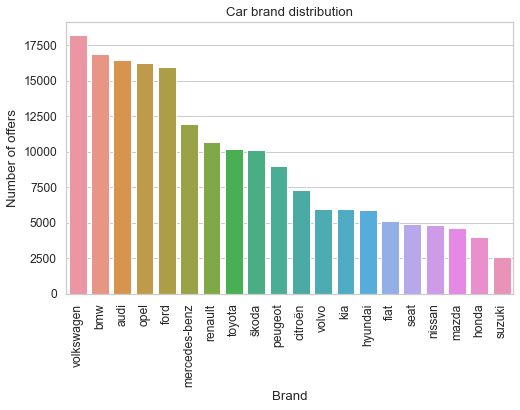

In [49]:
x = sns.barplot(x="index", y="Vehicle_brand", data=top_20_brand)
plt.xticks(rotation=90)
plt.title("Car brand distribution")
plt.xlabel("Brand")
plt.ylabel("Number of offers")

### Brand Model, version, generation

We drop columns **Generation**, cause its higly colerated with Production Year

In [50]:
df_cars.value_counts(['Vehicle_brand','Vehicle_model']).reset_index().head(10)

,Vehicle_brand,Vehicle_model,0
0,opel,astra,5290
1,bmw,seria 3,4557
2,audi,a4,4548
3,volkswagen,golf,4124
4,volkswagen,passat,4010
5,škoda,octavia,3896
6,ford,focus,3676
7,bmw,seria 5,3645
8,audi,a6,3354
9,ford,mondeo,3048


As we can see, the Volkswagen Group is very well represented. This proves that these are the most popular cars and these offers are the most numerous. 

# Correlation Price with other variables

<AxesSubplot:>

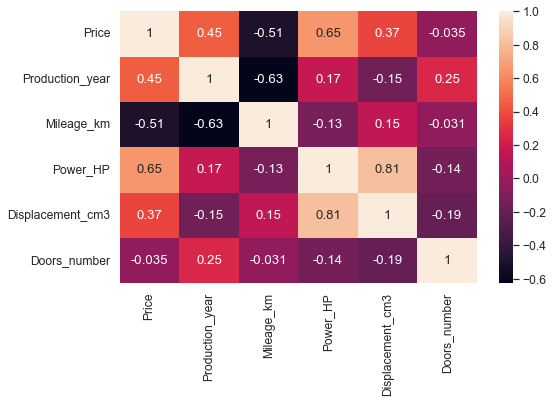

In [51]:
corr = df_cars.corr()

sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

It seams that Price is mostly corrlated with **ProductionYear**, **Displacement_cm3** and **Power_HP**. So let's see more detailed charts about these features.

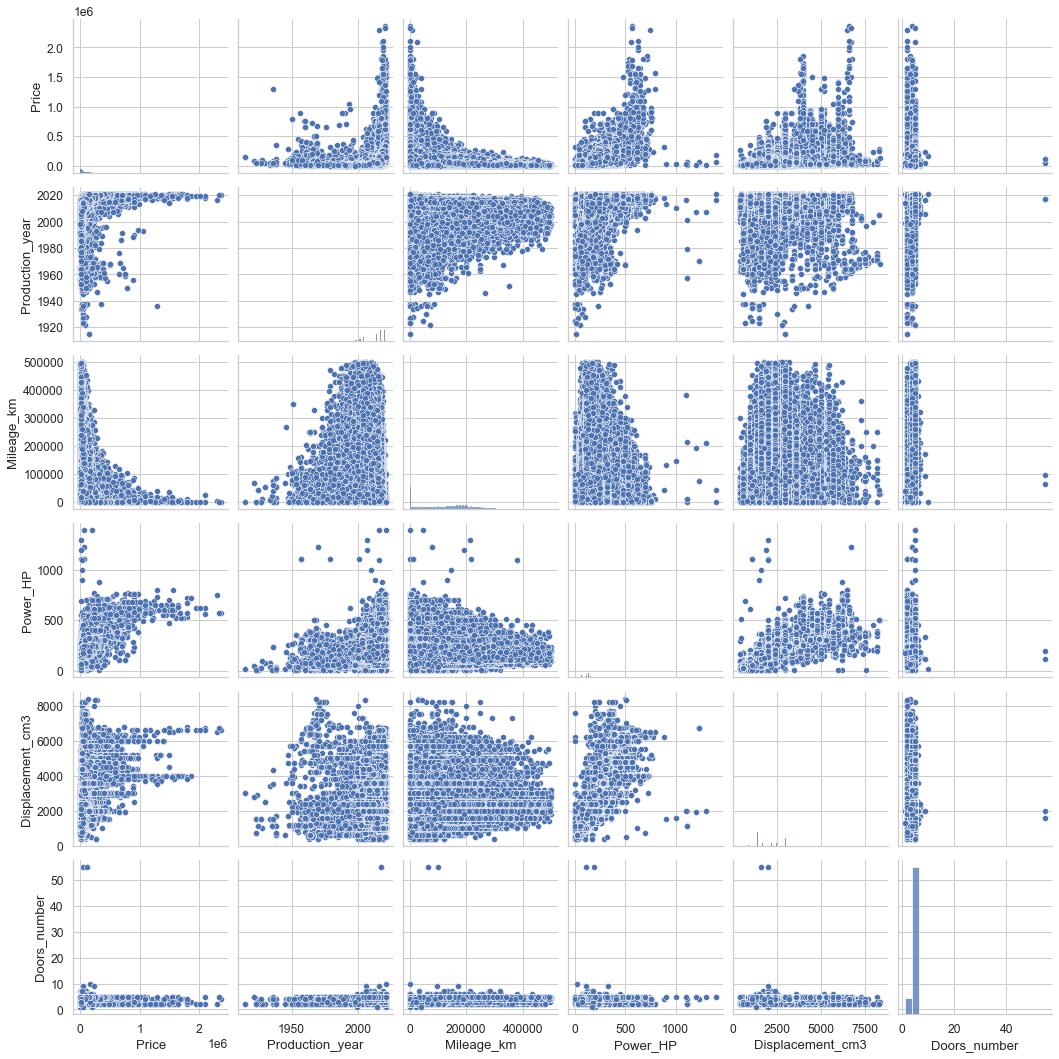

In [52]:
sns.pairplot(data=df_cars)

Price vs ProductionY

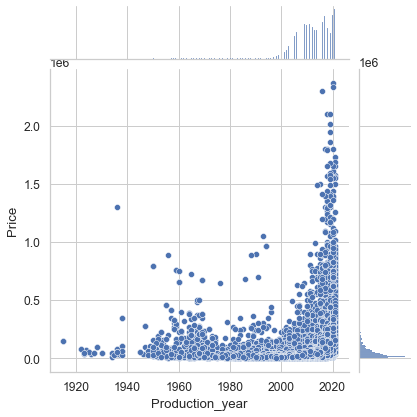

In [53]:
sns.jointplot(x=df_cars['Production_year'], y=df_cars['Price'])

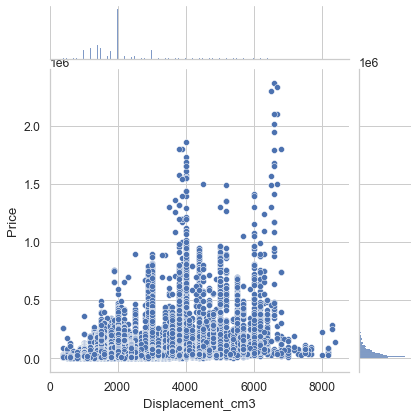

In [54]:
sns.jointplot(x=df_cars['Displacement_cm3'], y=df_cars['Price'])

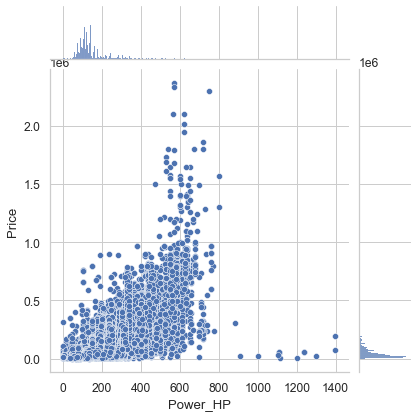

In [55]:
sns.jointplot(x=df_cars['Power_HP'], y=df_cars['Price'])

## Manova

In [56]:
from statsmodels.multivariate.manova import MANOVA

In [57]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd

reg = ols('Price ~ Production_year + Mileage_km+ Power_HP+ Displacement_cm3 +  Doors_number',data=df_cars).fit()
aov=sm.stats.anova_lm(reg,type=2)

In [58]:
print(aov)

                         df                 sum_sq                mean_sq  \
Production_year        1.00 284,815,047,180,004.88 284,815,047,180,004.88   
Mileage_km             1.00 110,977,285,546,902.88 110,977,285,546,902.88   
Power_HP               1.00 451,136,914,597,151.81 451,136,914,597,151.81   
Displacement_cm3       1.00   4,558,662,425,863.53   4,558,662,425,863.53   
Doors_number           1.00         768,900,110.11         768,900,110.11   
Residual         203,623.00 534,824,992,377,040.38       2,626,545,097.44   

                          F  PR(>F)  
Production_year  108,437.14    0.00  
Mileage_km        42,252.19    0.00  
Power_HP         171,760.58    0.00  
Displacement_cm3   1,735.61    0.00  
Doors_number           0.29    0.59  
Residual                NaN     NaN  


In [59]:
reg = ols('Price ~ Condition + Vehicle_brand + Vehicle_model + Fuel_type+ Drive + Transmission +  Type',data=df_cars).fit()
aov=sm.stats.anova_lm(reg,type=2)

In [60]:
print(aov)

                      df                 sum_sq                mean_sq  \
Condition           1.00 249,422,630,283,790.97 249,422,630,283,790.97   
Vehicle_brand     106.00 318,767,208,009,983.38   3,007,237,811,414.94   
Vehicle_model   1,194.00 348,311,955,731,563.81     291,718,555,889.08   
Fuel_type           6.00  10,498,790,555,235.43   1,749,798,425,872.57   
Drive               4.00  31,477,546,147,936.98   7,869,386,536,984.25   
Transmission        1.00  12,246,305,820,570.84  12,246,305,820,570.84   
Type                8.00     846,431,104,920.08     105,803,888,115.01   
Residual      190,599.00 393,695,788,372,587.38       2,065,571,111.98   

                       F  PR(>F)  
Condition     120,752.38    0.00  
Vehicle_brand   1,455.89    0.00  
Vehicle_model     141.23    0.00  
Fuel_type         847.13    0.00  
Drive           3,809.79    0.00  
Transmission    5,928.77    0.00  
Type               51.22    0.00  
Residual             NaN     NaN  


In [61]:
reg = ols('Price ~ Condition + Vehicle_brand + Vehicle_model + Production_year + Mileage_km+ Power_HP+ Displacement_cm3 + Fuel_type+ Drive + Transmission +  Type +  Doors_number',data=df_cars).fit()
aov=sm.stats.anova_lm(reg,type=2)

In [62]:
print(aov)

                         df                 sum_sq                mean_sq  \
Condition              1.00 236,375,768,207,460.88 236,375,768,207,460.88   
Vehicle_brand        106.00 301,395,002,671,351.00   2,843,349,081,805.20   
Vehicle_model      1,194.00 333,610,313,530,868.25     279,405,622,722.67   
Fuel_type              6.00   8,948,671,192,541.80   1,491,445,198,756.97   
Drive                  4.00  31,013,298,703,798.91   7,753,324,675,949.73   
Transmission           1.00  12,176,414,759,134.71  12,176,414,759,134.71   
Type                   8.00     792,713,940,227.47      99,089,242,528.43   
Production_year        1.00  84,937,054,483,685.59  84,937,054,483,685.59   
Mileage_km             1.00  20,717,950,215,826.52  20,717,950,215,826.52   
Power_HP               1.00  26,329,178,543,651.81  26,329,178,543,651.81   
Displacement_cm3       1.00   6,395,350,025,524.80   6,395,350,025,524.80   
Doors_number           1.00     217,925,532,552.90     217,925,532,552.90   

# Data processing 

In [63]:
df_cars.keys()

Index(['Price', 'Currency', 'Condition', 'Vehicle_brand', 'Vehicle_model',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'Drive', 'Transmission', 'Type', 'Doors_number',
       'Features'],
      dtype='object')

In [64]:
obj_df = df_cars.select_dtypes(include=['object']).copy()
obj_df.head()

,Currency,Condition,Vehicle_brand,Vehicle_model,Fuel_type,Drive,Transmission,Type,Features
0,PLN,new,abarth,595,Gasoline,front wheels,manual,small_cars,[]
1,PLN,used,abarth,other,Gasoline,front wheels,manual,coupe,[]
2,PLN,used,abarth,500,Gasoline,NaN,automatic,small_cars,"['ABS', 'Electric front windows', 'Drivers air..."
3,PLN,used,abarth,500,Gasoline,front wheels,manual,small_cars,"['ABS', 'Electric front windows', 'Drivers air..."
4,PLN,new,abarth,595,Gasoline,NaN,manual,small_cars,"['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [65]:
obj_df[obj_df.isnull().any(axis=1)]

,Currency,Condition,Vehicle_brand,Vehicle_model,Fuel_type,Drive,Transmission,Type,Features
2,PLN,used,abarth,500,Gasoline,NaN,automatic,small_cars,"['ABS', 'Electric front windows', 'Drivers air..."
4,PLN,new,abarth,595,Gasoline,NaN,manual,small_cars,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
6,PLN,used,abarth,595,Gasoline,NaN,manual,small_cars,[]
31,PLN,used,abarth,124,Gasoline,NaN,manual,convertible,"['Electric front windows', 'Passengers airbag'..."
39,PLN,new,abarth,595,Gasoline,NaN,manual,small_cars,"['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...
208298,PLN,used,zastava,750,Gasoline,NaN,manual,small_cars,[]
208299,PLN,used,żuk,other,Gasoline,NaN,manual,small_cars,[]
208301,PLN,used,żuk,other,Gasoline,NaN,manual,suv,[]
208302,PLN,used,żuk,other,Gasoline,NaN,manual,minivan,[]


In [66]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206805 entries, 0 to 208303
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Currency       206805 non-null  object
 1   Condition      206805 non-null  object
 2   Vehicle_brand  206805 non-null  object
 3   Vehicle_model  206805 non-null  object
 4   Fuel_type      206805 non-null  object
 5   Drive          191877 non-null  object
 6   Transmission   206335 non-null  object
 7   Type           206805 non-null  object
 8   Features       206805 non-null  object
dtypes: object(9)
memory usage: 23.8+ MB


Null values

In [67]:
total = df_cars.isnull().sum().sort_values(ascending=False)
total.head(19)

Drive               14928
Displacement_cm3     1881
Doors_number         1450
Power_HP              618
Transmission          470
Price                   0
Currency                0
Condition               0
Vehicle_brand           0
Vehicle_model           0
Production_year         0
Mileage_km              0
Fuel_type               0
Type                    0
Features                0
dtype: int64

In [68]:
cat_mis = ['Drive','Transmission']
num_mis = ['Displacement_cm3','Doors_number','Mileage_km','Power_HP']

In [69]:
df_cars.Doors_number.value_counts()

5.00     157815
4.00      27593
3.00      12763
2.00       7118
6.00         49
7.00          8
1.00          4
9.00          2
55.00         2
10.00         1
Name: Doors_number, dtype: int64

Let's change value of 55 doors to 5 for those 2 offers.

In [70]:
df_cars.loc[df_cars['Doors_number']==55.00, 'Doors_number']= 5

In [71]:
for i in num_mis:
    df_cars[i].fillna((df_cars[i].median()), inplace=True)

In [72]:
df_cars.Doors_number.value_counts()

5.00     159267
4.00      27593
3.00      12763
2.00       7118
6.00         49
7.00          8
1.00          4
9.00          2
10.00         1
Name: Doors_number, dtype: int64

In [73]:
for feature in cat_mis:
    df_cars[feature] = df_cars[feature].fillna(df_cars[feature].mode()[0])

In [74]:
df_cars.Drive.value_counts()

front wheels                    154078
rear wheels                      17922
4x4 (permanent)                  16885
4x4 (attached automatically)     15140
4x4 (attached manually)           2780
Name: Drive, dtype: int64

In [75]:
df_cars.Transmission.value_counts()

manual       132824
automatic     73981
Name: Transmission, dtype: int64

In [76]:
df_cars.Condition.value_counts()

used    182370
new      24435
Name: Condition, dtype: int64

## Feature selection

### Encoding

In [77]:
X_var = df_cars[['Condition', 'Vehicle_brand',
       'Vehicle_model', 'Production_year', 'Mileage_km',
       'Power_HP', 'Displacement_cm3','Drive',
       'Transmission', 'Type', 'Doors_number']]
y_var = df_cars['Price'].values

Create dictionary with mapping for new data encoding

In [78]:
X_var

,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Drive,Transmission,Type,Doors_number
0,new,abarth,595,2021,1.00,145.00,"1,400.00",front wheels,manual,small_cars,3.00
1,used,abarth,other,1974,"59,000.00",75.00,"1,100.00",front wheels,manual,coupe,2.00
2,used,abarth,500,2018,"52,000.00",180.00,"1,400.00",front wheels,automatic,small_cars,3.00
3,used,abarth,500,2012,"29,000.00",160.00,"1,400.00",front wheels,manual,small_cars,3.00
4,new,abarth,595,2021,600.00,165.00,"1,400.00",front wheels,manual,small_cars,3.00
...,...,...,...,...,...,...,...,...,...,...,...
208299,used,żuk,other,2014,"40,000.00",173.00,"1,300.00",front wheels,manual,small_cars,1.00
208300,used,żuk,other,1970,"63,518.00",70.00,"2,100.00",rear wheels,manual,station_wagon,4.00
208301,used,żuk,other,1977,"11,880.00",60.00,"2,100.00",front wheels,manual,suv,3.00
208302,used,żuk,other,1986,"100,000.00",36.00,"2,200.00",front wheels,manual,minivan,2.00


In [79]:
s = pd.DataFrame({col: df_cars[col].astype('category').cat.codes for col in df_cars[categorical_columns]}, index=df_cars.index)
s.head()

,Condition,Vehicle_brand,Vehicle_model,Drive,Transmission,Type
0,0,0,123,3,1,6
1,1,0,781,3,1,3
2,1,0,113,3,0,6
3,1,0,113,3,1,6
4,0,0,123,3,1,6


In [80]:
se = {col: {cat: n for n, cat in enumerate(df_cars[col].astype('category').cat.categories)} 
     for col in df_cars[categorical_columns]}
with open('labels.pkl', 'wb') as fp:
    pickle.dump(se, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [81]:
X_final = X_var[['Production_year','Mileage_km','Power_HP','Displacement_cm3','Doors_number']]
X_final

,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number
0,2021,1.00,145.00,"1,400.00",3.00
1,1974,"59,000.00",75.00,"1,100.00",2.00
2,2018,"52,000.00",180.00,"1,400.00",3.00
3,2012,"29,000.00",160.00,"1,400.00",3.00
4,2021,600.00,165.00,"1,400.00",3.00
...,...,...,...,...,...
208299,2014,"40,000.00",173.00,"1,300.00",1.00
208300,1970,"63,518.00",70.00,"2,100.00",4.00
208301,1977,"11,880.00",60.00,"2,100.00",3.00
208302,1986,"100,000.00",36.00,"2,200.00",2.00


In [82]:
X_final

,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number
0,2021,1.00,145.00,"1,400.00",3.00
1,1974,"59,000.00",75.00,"1,100.00",2.00
2,2018,"52,000.00",180.00,"1,400.00",3.00
3,2012,"29,000.00",160.00,"1,400.00",3.00
4,2021,600.00,165.00,"1,400.00",3.00
...,...,...,...,...,...
208299,2014,"40,000.00",173.00,"1,300.00",1.00
208300,1970,"63,518.00",70.00,"2,100.00",4.00
208301,1977,"11,880.00",60.00,"2,100.00",3.00
208302,1986,"100,000.00",36.00,"2,200.00",2.00


In [83]:
X_var =  pd.concat([X_final, s], axis=1)
X_var

,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Condition,Vehicle_brand,Vehicle_model,Drive,Transmission,Type
0,2021,1.00,145.00,"1,400.00",3.00,0,0,123,3,1,6
1,1974,"59,000.00",75.00,"1,100.00",2.00,1,0,781,3,1,3
2,2018,"52,000.00",180.00,"1,400.00",3.00,1,0,113,3,0,6
3,2012,"29,000.00",160.00,"1,400.00",3.00,1,0,113,3,1,6
4,2021,600.00,165.00,"1,400.00",3.00,0,0,123,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...
208299,2014,"40,000.00",173.00,"1,300.00",1.00,1,106,781,3,1,6
208300,1970,"63,518.00",70.00,"2,100.00",4.00,1,106,781,4,1,7
208301,1977,"11,880.00",60.00,"2,100.00",3.00,1,106,781,3,1,8
208302,1986,"100,000.00",36.00,"2,200.00",2.00,1,106,781,3,1,4


## Feature importance

In [84]:
names_of_features = {i:v for i,v in enumerate(X_var.columns)}
names_of_features

{0: 'Production_year',
 1: 'Mileage_km',
 2: 'Power_HP',
 3: 'Displacement_cm3',
 4: 'Doors_number',
 5: 'Condition',
 6: 'Vehicle_brand',
 7: 'Vehicle_model',
 8: 'Drive',
 9: 'Transmission',
 10: 'Type'}

### Linear regression

Feature: 0, Score: 825.13300 -->  Production_year
Feature: 1, Score: -0.21574 -->  Mileage_km
Feature: 2, Score: 699.22143 -->  Power_HP
Feature: 3, Score: -13.65058 -->  Displacement_cm3
Feature: 4, Score: -2579.21059 -->  Doors_number
Feature: 5, Score: -49447.15759 -->  Condition
Feature: 6, Score: 55.79848 -->  Vehicle_brand
Feature: 7, Score: 1.59544 -->  Vehicle_model
Feature: 8, Score: -6513.06914 -->  Drive
Feature: 9, Score: -6079.83041 -->  Transmission
Feature: 10, Score: 141.87920 -->  Type


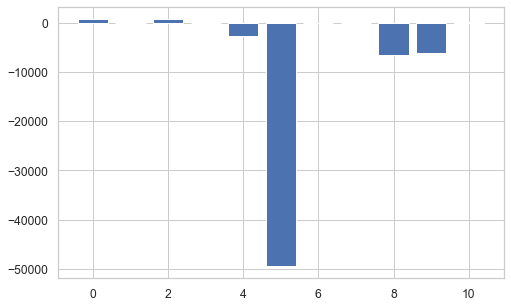

In [85]:
from matplotlib import pyplot
model = LinearRegression()
# fit the model
model.fit(X_var, y_var)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v) ,f"-->  {names_of_features[i]}")
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### DecisionTreeRegressor

Feature: 0, Score: 0.36533 -->  Production_year
Feature: 1, Score: 0.03533 -->  Mileage_km
Feature: 2, Score: 0.46243 -->  Power_HP
Feature: 3, Score: 0.04297 -->  Displacement_cm3
Feature: 4, Score: 0.00343 -->  Doors_number
Feature: 5, Score: 0.00148 -->  Condition
Feature: 6, Score: 0.02612 -->  Vehicle_brand
Feature: 7, Score: 0.04094 -->  Vehicle_model
Feature: 8, Score: 0.01056 -->  Drive
Feature: 9, Score: 0.00300 -->  Transmission
Feature: 10, Score: 0.00841 -->  Type


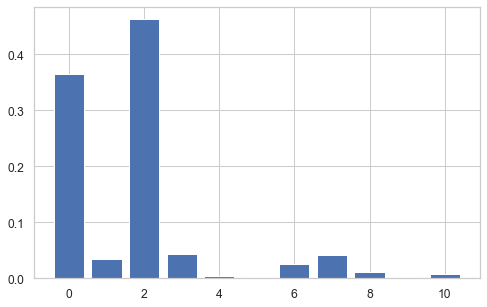

In [86]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
model = DecisionTreeRegressor()
# fit the model
model.fit(X_var, y_var)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v),f"-->  {names_of_features[i]}")
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Final features

In [87]:
X_var = X_var.values

In [88]:
X_var

array([[2.0210e+03, 1.0000e+00, 1.4500e+02, ..., 3.0000e+00, 1.0000e+00,
        6.0000e+00],
       [1.9740e+03, 5.9000e+04, 7.5000e+01, ..., 3.0000e+00, 1.0000e+00,
        3.0000e+00],
       [2.0180e+03, 5.2000e+04, 1.8000e+02, ..., 3.0000e+00, 0.0000e+00,
        6.0000e+00],
       ...,
       [1.9770e+03, 1.1880e+04, 6.0000e+01, ..., 3.0000e+00, 1.0000e+00,
        8.0000e+00],
       [1.9860e+03, 1.0000e+05, 3.6000e+01, ..., 3.0000e+00, 1.0000e+00,
        4.0000e+00],
       [1.9850e+03, 2.0056e+04, 7.0000e+01, ..., 3.0000e+00, 1.0000e+00,
        4.0000e+00]])

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print('X_train samples : ', X_train[0:5])
print('X_test samples : ', X_test[0:5])
print('y_train samples : ', y_train[0:5])
print('y_test samples : ', y_test[0:5])

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train samples :  [[2.014e+03 6.500e+04 1.920e+02 2.000e+03 3.000e+00 1.000e+00 6.000e+01
  3.480e+02 3.000e+00 0.000e+00 0.000e+00]
 [2.019e+03 3.830e+02 1.900e+02 2.000e+03 5.000e+00 1.000e+00 9.800e+01
  7.960e+02 3.000e+00 0.000e+00 7.000e+00]
 [2.019e+03 7.700e+03 3.660e+02 3.300e+03 4.000e+00 1.000e+00 4.200e+01
  1.005e+03 0.000e+00 0.000e+00 5.000e+00]
 [2.018e+03 4.060e+04 1.770e+02 1.600e+03 5.000e+00 1.000e+00 3.500e+01
  6.420e+02 0.000e+00 0.000e+00 8.000e+00]
 [1.989e+03 8.000e+04 7.300e+01 1.400e+03 2.000e+00 1.000e+00 2.900e+01
  4.460e+02 3.000e+00 1.000e+00 2.000e+00]]
X_test samples :  [[2.011e+03 1.810e+05 1.400e+02 2.000e+03 5.000e+00 1.000e+00 1.800e+01
  2.780e+02 3.000e+00 1.000e+00 7.000e+00]
 [2.008e+03 1.680e+05 1.090e+02 1.600e+03 4.000e+00 1.000e+00 9.900e+01
  9.110e+02 3.000e+00 1.000e+00 5.000e+00]
 [2.017e+03 2.300e+05 1.500e+02 2.000e+03 5.000e+00 1.000e+00 1.050e+02
  1.017e+03 3.000e+00 0.000e+00 7.000e+00]
 [2.012e+03 2.250e+05 1.360e+02 1.700e+03 

## Parameters Tunning (GridSearch)

In [90]:
params = {
    # Parameters that we are going to tune.
    'max_depth':[3,5,10]} # 6 default

In [91]:
xgb_model_default  = xgb.XGBRegressor(verbosity=1, n_estimators=500, max_depth=10)
grid_search =  GridSearchCV(xgb_model_default, param_grid=params,cv=10, verbose=3)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV 1/10] END ......................max_depth=3;, score=0.928 total time=  11.0s
[CV 2/10] END ......................max_depth=3;, score=0.921 total time=  10.9s
[CV 3/10] END ......................max_depth=3;, score=0.925 total time=  10.9s
[CV 4/10] END ......................max_depth=3;, score=0.897 total time=  10.8s
[CV 5/10] END ......................max_depth=3;, score=0.918 total time=  10.8s
[CV 6/10] END ......................max_depth=3;, score=0.925 total time=  10.8s
[CV 7/10] END ......................max_depth=3;, score=0.935 total time=  10.8s
[CV 8/10] END ......................max_depth=3;, score=0.930 total time=  10.8s
[CV 9/10] END ......................max_depth=3;, score=0.912 total time=  11.0s
[CV 10/10] END .....................max_depth=3;, score=0.929 total time=  11.0s
[CV 1/10] END ......................max_depth=5;, score=0.945 total time=  18.3s
[CV 2/10] END ......................max_depth=5;

KeyboardInterrupt: 

## Regression

In [93]:
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

#6. XGB- default parameters
xgb_model_default  = xgb.XGBRegressor(verbosity=1, max_depth=10,enable_categorical=True)
xgb_model_default.fit(X_train, y_train)
xgb_yhat= xgb_model_default.predict(X_test)

#7 XGB - grid search 
xgb_model_grid  = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             validate_parameters=1, verbosity=1,enable_categorical=True)
xgb_model_grid.fit(X_train, y_train)
xgb_grid_yhat= xgb_model_grid.predict(X_test)

[11:52:15] WARNING: ..\src\learner.cc:541: 
Parameters: { enable_categorical } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:52:24] WARNING: ..\src\learner.cc:541: 
Parameters: { enable_categorical } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




# Compare models

Text(0, 0.5, 'Predicted by ols_yhat')

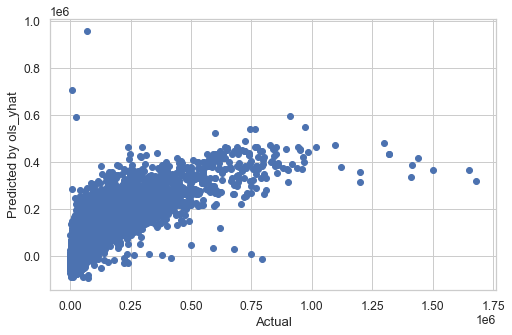

In [94]:
fig, ax = plt.subplots()
ax.scatter(y_test, ols_yhat)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted by ols_yhat')

Text(0, 0.5, 'Predicted by ridge_yhat')

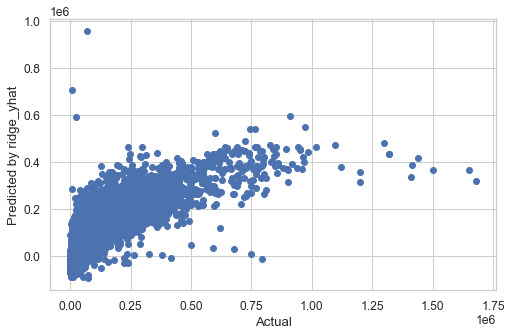

In [95]:
fig, ax = plt.subplots()
ax.scatter(y_test, ridge_yhat)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted by ridge_yhat')

Text(0, 0.5, 'Predicted by lasso_yhat')

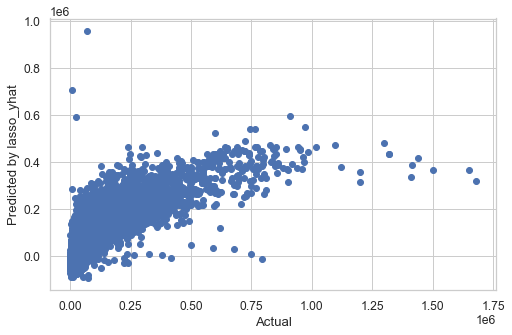

In [96]:
fig, ax = plt.subplots()
ax.scatter(y_test, lasso_yhat)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted by lasso_yhat')

Text(0, 0.5, 'Predicted by bayesian_yhat')

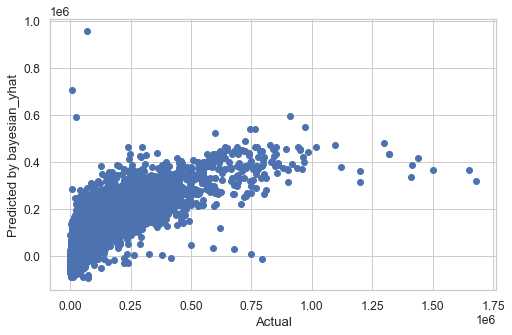

In [97]:
fig, ax = plt.subplots()
ax.scatter(y_test, bayesian_yhat)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted by bayesian_yhat')

Text(0, 0.5, 'Predicted by ElasticNet')

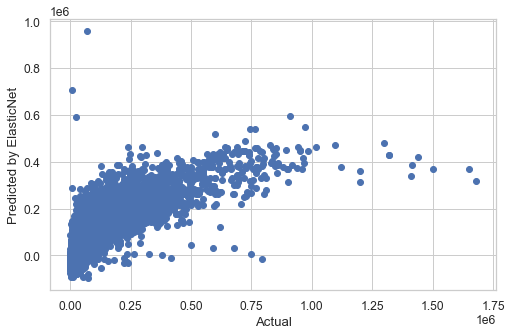

In [98]:
fig, ax = plt.subplots()
ax.scatter(y_test, en_yhat)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted by ElasticNet')

Text(0, 0.5, 'Predicted by XGBooost')

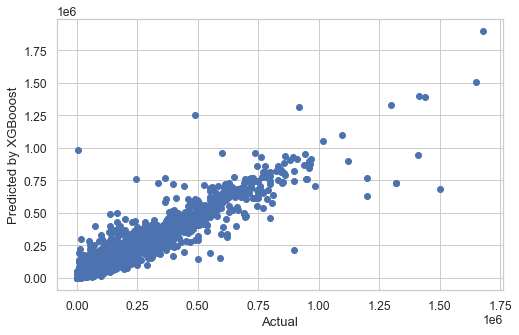

In [99]:
fig, ax = plt.subplots()
ax.scatter(y_test, xgb_yhat)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted by XGBooost')

Text(0, 0.5, 'Predicted by XGBooost - Grid Search')

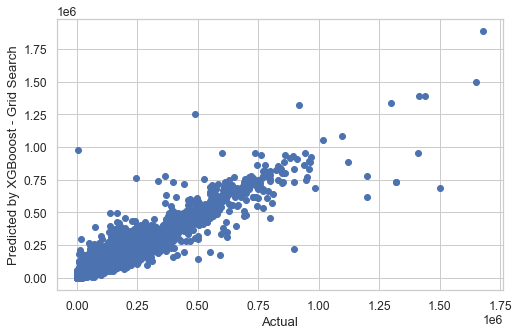

In [100]:
fig, ax = plt.subplots()
ax.scatter(y_test, xgb_grid_yhat)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted by XGBooost - Grid Search')

In [101]:
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn.metrics import mean_absolute_error

In [102]:
print('EXPLAINED VARIANCE SCORE:')
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of OLS model is {}'.format(round(evs(y_test, ols_yhat),3)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Ridge model is {}'.format(round(evs(y_test, ridge_yhat),3)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Lasso model is {}'.format(round(evs(y_test, lasso_yhat),3)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of Bayesian model is {}'.format(round(evs(y_test, bayesian_yhat),3)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of ElasticNet is {}'.format(round(evs(y_test, en_yhat),3)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of XGBoost is {}'.format(round(evs(y_test, xgb_yhat),3)))
print('-------------------------------------------------------------------------------')
print('Explained Variance Score of XGBoost-Grid is {}'.format(round(evs(y_test, xgb_grid_yhat),3)))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.659
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.659
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.659
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.659
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.659
-------------------------------------------------------------------------------
Explained Variance Score of XGBoost is 0.935
-------------------------------------------------------------------------------
Explained Variance Score of XGBoost-Grid is 0.934
--------------------------------------------------------------------------

In [103]:
print('R-SQUARED:',)
print('-------------------------------------------------------------------------------')
print('R-Squared of OLS model is {}'.format(round(r2(y_test, ols_yhat),3)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Ridge model is {}'.format(round(r2(y_test, ridge_yhat),3)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Lasso model is {}'.format(round(r2(y_test, lasso_yhat),3)))
print('-------------------------------------------------------------------------------')
print('R-Squared of Bayesian model is {}'.format(round(r2(y_test, bayesian_yhat),3)))
print('-------------------------------------------------------------------------------')
print('R-Squared of ElasticNet is {}'.format(round(r2(y_test, en_yhat),3)))
print('-------------------------------------------------------------------------------')
print('R-Squared of XGBoost model is {}'.format(round(r2(y_test, xgb_yhat),3)))
print('-------------------------------------------------------------------------------')
print('R-Squared of XGBoost -Grid model is {}'.format(round(r2(y_test, xgb_grid_yhat),3)))
print('-------------------------------------------------------------------------------')

R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.659
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.659
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.659
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.659
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.659
-------------------------------------------------------------------------------
R-Squared of XGBoost model is 0.935
-------------------------------------------------------------------------------
R-Squared of XGBoost -Grid model is 0.934
-------------------------------------------------------------------------------


In [104]:
print('RMSE:')
print('-------------------------------------------------------------------------------')
print('RMSE of OLS model is {}'.format(round(mean_absolute_error(y_test, ols_yhat),3)))
print('-------------------------------------------------------------------------------')
print(('RMSE of Ridge model is {}'.format(round(mean_absolute_error(y_test, ridge_yhat),3))))
print('-------------------------------------------------------------------------------')
print(('RMSE of Lasso model is {}'.format(round(mean_absolute_error(y_test, lasso_yhat),3))))
print('-------------------------------------------------------------------------------')
print(('RMSE of Bayesian model is {}'.format(round(mean_absolute_error(y_test, bayesian_yhat),3))))
print('-------------------------------------------------------------------------------')
print(('RMSE of ElasticNet is {}'.format(round(mean_absolute_error(y_test, en_yhat),3))))
print('-------------------------------------------------------------------------------')
print(('RMSE of XGBoost model is {}'.format(round(mean_absolute_error(y_test, xgb_yhat),3))))
print('-------------------------------------------------------------------------------')
print(('RMSE of XGBoost model is {}'.format(round(mean_absolute_error(y_test, xgb_grid_yhat),3))))
print('-------------------------------------------------------------------------------')

RMSE:
-------------------------------------------------------------------------------
RMSE of OLS model is 26414.698
-------------------------------------------------------------------------------
RMSE of Ridge model is 26414.668
-------------------------------------------------------------------------------
RMSE of Lasso model is 26414.696
-------------------------------------------------------------------------------
RMSE of Bayesian model is 26414.043
-------------------------------------------------------------------------------
RMSE of ElasticNet is 26376.282
-------------------------------------------------------------------------------
RMSE of XGBoost model is 8117.015
-------------------------------------------------------------------------------
RMSE of XGBoost model is 8110.04
-------------------------------------------------------------------------------


In [105]:
sub = pd.DataFrame()
sub['Price_Y'] = y_test
sub['Price_OLS']=ols_yhat
sub['Price_RIDGE']=ridge_yhat
sub['Price_LASSO']=lasso_yhat
sub['Price_BAY']=bayesian_yhat
sub['Price_EN'] = en_yhat
sub['Price_XGB'] = xgb_yhat
sub['Price XGB-Grid'] =xgb_grid_yhat
sub.sample(10)

,Price_Y,Price_OLS,Price_RIDGE,Price_LASSO,Price_BAY,Price_EN,Price_XGB,Price XGB-Grid
9363,"169,999.00","117,769.62","117,770.35","117,769.65","117,785.57","118,897.55","162,493.39","166,663.17"
38560,"12,500.00","28,573.14","28,573.23","28,573.12","28,575.03","28,705.19","14,038.11","13,581.26"
5261,"67,200.00","116,494.40","116,493.25","116,494.35","116,469.30","114,720.33","68,952.52","65,287.35"
4749,"58,000.00","88,328.05","88,326.68","88,327.97","88,298.20","86,213.42","54,823.63","54,671.27"
6677,"12,000.00","20,348.30","20,348.41","20,348.31","20,350.64","20,515.26","8,980.11","9,542.05"
4053,"4,990.00","-38,975.91","-38,976.48","-38,975.93","-38,988.40","-39,861.92","3,439.38","3,989.20"
15169,"29,900.00","39,423.02","39,423.35","39,423.06","39,430.33","39,942.48","32,209.59","32,087.32"
25320,"13,999.00","20,255.74","20,255.69","20,255.76","20,254.53","20,172.89","12,922.63","13,402.21"
12257,"19,000.00","15,084.70","15,084.62","15,084.71","15,083.03","14,969.32","19,823.79","18,827.11"
36471,"79,900.00","98,411.00","98,411.49","98,411.02","98,421.54","99,154.44","77,829.22","80,842.45"


# Save models

In [106]:
import pickle
models = {"linear":ols,"ridge":ridge,"lasso":lasso,"bayesian":bayesian,"elastic":en,"xgb":xgb_model_default,"xgb_grid":xgb_model_grid}
for model in models.keys():
    pickle.dump(models[model], open(f"{model}_test.pkl", "wb"))

## Test load&prediction 

Step by step :
    1. Load model 
    2. Create dataframe with new data 
    3. Encode new data 
    4. Predict based on new data

In [107]:
#load
xgb_model_loaded = pickle.load(open("xgb_grid_test.pkl", "rb"))
#predict
test = X_test
xgb_model_grid.predict(test)[0] == xgb_model_loaded.predict(test)[0]

True

In [108]:
xgb_model_default.predict(test)[0]

26740.062

In [109]:
xgb_model_loaded.predict(X_test)[0]

25992.418

In [110]:
y_test[0]

24900.0

In [111]:
encoder_dict = pickle.load(open("labels.pkl", "rb"))

In [112]:
encoder_dict

{'Condition': {'new': 0, 'used': 1},
 'Vehicle_brand': {'abarth': 0,
  'acura': 1,
  'aixam': 2,
  'alfa romeo': 3,
  'alpine': 4,
  'aston martin': 5,
  'audi': 6,
  'austin': 7,
  'autobianchi': 8,
  'baic': 9,
  'bentley': 10,
  'bmw': 11,
  'buick': 12,
  'cadillac': 13,
  'casalini': 14,
  'chatenet': 15,
  'chevrolet': 16,
  'chrysler': 17,
  'citroën': 18,
  'cupra': 19,
  'dacia': 20,
  'daewoo': 21,
  'daihatsu': 22,
  'dfsk': 23,
  'dkw': 24,
  'dodge': 25,
  'ds automobiles': 26,
  'ferrari': 27,
  'fiat': 28,
  'ford': 29,
  'gaz': 30,
  'gmc': 31,
  'grecav': 32,
  'honda': 33,
  'hummer': 34,
  'hyundai': 35,
  'infiniti': 36,
  'inny': 37,
  'isuzu': 38,
  'iveco': 39,
  'jaguar': 40,
  'jeep': 41,
  'kia': 42,
  'lada': 43,
  'lamborghini': 44,
  'lancia': 45,
  'land rover': 46,
  'lexus': 47,
  'ligier': 48,
  'lincoln': 49,
  'lotus': 50,
  'man': 51,
  'maserati': 52,
  'maybach': 53,
  'mazda': 54,
  'mclaren': 55,
  'mercedes-benz': 56,
  'mercury': 57,
  'mg': 58

In [113]:
new_pred = {"row":[2000,350000,300,0,5,"new","bmw",np.nan,"front wheels","manual","small_cars"]}
new_pred  = pd.DataFrame.from_dict(new_pred, orient='index', columns=['Production_year','Mileage_km','Power_HP','Displacement_cm3','Doors_number','Condition', 'Vehicle_brand',
       'Vehicle_model','Drive','Transmission', 'Type'])
new_pred

,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Condition,Vehicle_brand,Vehicle_model,Drive,Transmission,Type
row,2000,350000,300,0,5,new,bmw,NaN,front wheels,manual,small_cars


In [114]:
new_data_prediction = new_pred.replace(encoder_dict)
new_data_prediction

,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Condition,Vehicle_brand,Vehicle_model,Drive,Transmission,Type
row,2000,350000,300,0,5,0,11,NaN,3,1,6


In [115]:
xgb_model_loaded.predict(new_data_prediction.values)[0]

5834.024

In [116]:
xgb_model_default.predict(new_data_prediction.values)[0]

3477.0803

In [117]:
new_pred = {"row":[2015,150000,380,3000,5,0,"bmw",'m5',0,0,0]}
new_pred  = pd.DataFrame.from_dict(new_pred, orient='index', columns=['Production_year','Mileage_km','Power_HP','Displacement_cm3','Doors_number','Condition', 'Vehicle_brand',
       'Vehicle_model','Drive','Transmission', 'Type'])
new_pred

,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Condition,Vehicle_brand,Vehicle_model,Drive,Transmission,Type
row,2015,150000,380,3000,5,0,bmw,m5,0,0,0


In [118]:
new_data_prediction = new_pred.replace(encoder_dict)
new_data_prediction

,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Condition,Vehicle_brand,Vehicle_model,Drive,Transmission,Type
row,2015,150000,380,3000,5,0,11,690,0,0,0


In [119]:
xgb_model_default.predict(new_data_prediction.values)[0]

160341.88

https://www.otomoto.pl/osobowe/bmw/m5/od-2015/?search%5Bfilter_float_year%3Ato%5D=2016&search%5Border%5D=created_at%3Adesc&search%5Bbrand_program_id%5D%5B0%5D=&search%5Bcountry%5D=